# Metode Numerik - Final Project

**Kenali sapinya**

Anda memiliki 2 jenis gambar yaitu sapi tanpa background dan sapi dengan background.
Buatlah model pola sapi dengan gambar tanpa background. Kemudian gunakan pola tersebut untuk mendeteksi sapi dengan background. Gunakan interpolasi dan finite difference atau metode lain di dalam materi metode numerik.

Note:
1. Tidak boleh menggunakan library kecuali untuk membaca image
2. Algoritma Anda rancang sendiri dan implementasikan sendiri from scratch
3. Satu kelompok terdiri dari 4 orang.

--- 

## Idea

Finite Difference -> edge detection

Interpolation -> resize image

Linear Regression or Polinomial Regression w/ threshold -> classifier

## Data
---

In [1]:
import matplotlib.pyplot as plt
import os

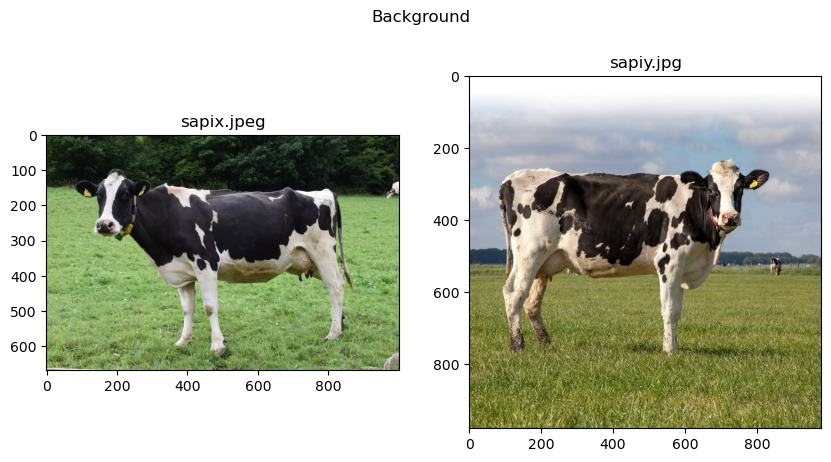

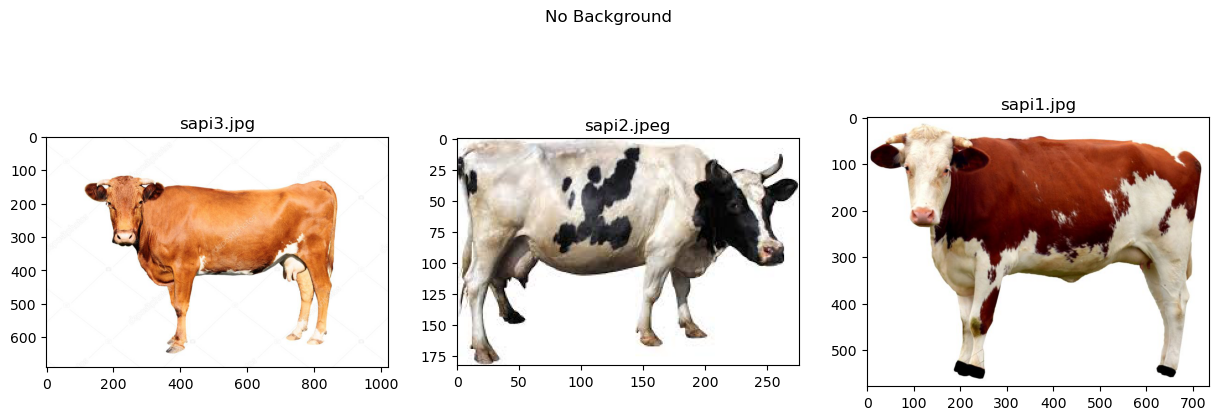

In [2]:
bg = os.listdir('./data/bg')
no_bg = os.listdir('./data/no_bg')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Background')
for i, img_file in enumerate(bg):
    img = plt.imread('./data/bg/' + img_file)
    ax[i].imshow(img)
    ax[i].set_title(img_file)
    
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('No Background')
for i, img_file in enumerate(no_bg):
    img = plt.imread('./data/no_bg/' + img_file)
    ax[i].imshow(img)
    ax[i].set_title(img_file)
    
plt.show()

        

## Utilities
---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class I:
    '''
    Custom Image Class
    '''
    image=[[]]
    
    def __init__(self, image: list):
        self.image = image
        
    @staticmethod
    def from_np(image: np.ndarray) -> 'I':
        # convert np array to list
        image = image.tolist()
        return I(image)
    
    @staticmethod
    def read(img_path) -> list:
        img = plt.imread(img_path)
        img.tolist()
        return img
    
    @staticmethod
    def show(img: list) -> None:
        plt.imshow(img)
        plt.show()
    
    def display(self) -> None:
        plt.imshow(self.image)
        plt.show()

In [20]:
img = I.from_np(plt.imread('./data/no_bg/sapi1.jpg')).image

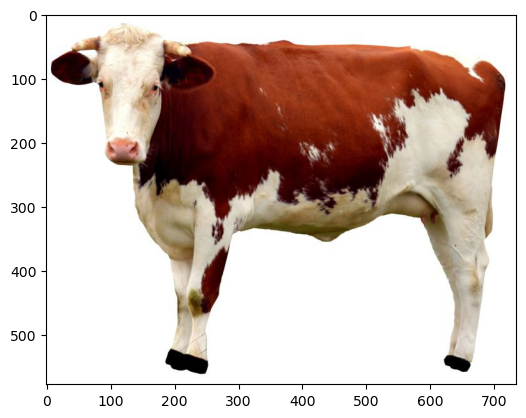

In [22]:
I.show(img=img)

## Feature Extraction
---

### first order derivative

forward difference: $ f'(x) = \frac{f(x+h) - f(x)}{h} $

backward difference: $ f'(x) = \frac{f(x) - f(x-h)}{h} $

central difference: $ f'(x) = \frac{f(x+h) - f(x-h)}{2h} $


### second order derivative

forward difference: $ f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} $

backward difference: $ f''(x) = \frac{f(x+2h) - 2f(x+h) + f(x)}{h^2} $

central difference: $ f''(x) = \frac{f(x) - 2f(x-h) + f(x-2h)}{h^2} $

### Interpolation

linear interpolation: $ f(x) = f(x_0) + \frac{f(x_1) - f(x_0)}{x_1 - x_0}(x - x_0) $

quadratic interpolation: $ f(x) = f(x_0) + \frac{f(x_1) - f(x_0)}{x_1 - x_0}(x - x_0) + \frac{f(x_2) - 2f(x_1) + f(x_0)}{2(x_1 - x_0)^2}(x - x_0)(x - x_1) $

In [ ]:
class FirstOrderFiniteDifference:
    # assume dx = 1
    @staticmethod
    def difference(y1, y2):
        return (y2 - y1) / 1
    
    @staticmethod
    def central_difference(y1, y2):
        return (y2 - y1) / 2

In [ ]:
class SecondOrderFiniteDifference:
    # assume dx = 1
    @staticmethod
    def difference(y1, y2, y3):
        return (y3 - 2 * y2 + y1) / 1 ** 2
    
    @staticmethod
    def central_difference(y1, y2, y3):
        return (y3 - 2 * y2 + y1) / 2 ** 2

## Classifier

Linear Regression

---

In [67]:
class LinearRegressor:
    m = [float] # weights
    
    def __init__(self, m=[float]):
        '''
        initialize a liniear regression function
        y = m0 + m1x1 + m2x2 + ... + mnxn
        x: [1, x1, x2, ..., xn]
        m: [m0, m1, m2, ..., mn]
        '''
        self.m = m
        
    def predict(self, x):
        '''
        predict y value from x
        y = m0 + m1x1 + m2x2 + ... + mnxn
        '''
        y = 0
        n = len(self.m)
        for i in range(n):
            y += self.m[i] * x[i]
        return y
    
    def fit(self, X: list[list[float]], y: list, lr=0.01, epochs=10, epsilon=0.1):
        '''
        fit the model with X and y using gradient descent
        X: [[1, x1, x2, ..., xn], ...]
        y: [y1, y2, ..., yn]
        lr: learning rate -> float
        epsilon: error threshold -> float
        epochs: number of epochs -> int
        ---
        updates self.m
        '''
        if len(X) != len(y):
            raise Exception('X and y must have same length')
        
        n = len(X)
        # Create X matrix with 1s as first column
        X = [[1] + X[i] for i in range(n)]
        
        # Create initial m weights
        self.m = [1 for i in range(len(X[0]))]
        
        # Gradient Descent
        for epoch in range(epochs):
            # Calculate error
            y_pred = [self.predict(X[i]) for i in range(n)]
            e = LinearRegressor.loss(y_pred, y)
            
            # Calculate gradient
            grad = [0 for i in range(len(X[0]))]
            for i in range(n):
                for j in range(len(X[0])):
                    grad[j] += (y_pred[i] - y[i]) * X[i][j]
            for j in range(len(X[0])):
                grad[j] = grad[j] / n
            
            # Update m
            for j in range(len(X[0])):
                self.m[j] = self.m[j] - lr * grad[j]
            
            # Print progress
            if epoch % 100 == 0:
                print(f'Epoch: {epoch}\nError: {e}\n')
            
            # Check error threshold
            if e < epsilon:
                break

        print(f'X: {X}\nm: {self.m}')
        pass
    
    def loss(y_pred, y_true):
        '''
        Mean Squared Error
        e = (1/n) * (sigma: i~n) (y_pred[i] - y_true[i]) ** 2
        '''
        if len(y_pred) != len(y_true):
            raise Exception('y_pred and y_true must have same length')
        
        e = 0
        n = len(y_pred)
        for i in range(n):
            e += (y_pred[i] - y_true[i]) ** 2
        return e / n

In [68]:
lr = LinearRegressor()

In [69]:
lr.fit(X=[[1, 1], [1, 2], [1, 3]], y=[1, 2, 3])

X: [[1, 1, 1], [1, 1, 2], [1, 1, 3]]
m: [1, 1, 1]


## Edge Detection